# Load and Parse JSON Data
Use json module to load the polygon data and extract the image filename, segmentation coordinates, and confidence score.

In [9]:
import json
import os

data_file_path = 'output/polygon.json'

# Load the JSON data from the file
with open(data_file_path) as f:
    data = json.load(f)

# Extract the image filename, segmentation coordinates, and confidence score
image_filename = data['image']
segmentation_coords = data['segmentation']
confidence_score = data['confidence_score']

# Print the extracted data for verification
print(f"Image Filename: {image_filename}")
print(f"Segmentation Coordinates: {segmentation_coords}")
print(f"Confidence Score: {confidence_score}")

Image Filename: 1738856805878.jpg
Segmentation Coordinates: [1279, 504, 1274, 504, 1273, 503, 1273, 502, 1272, 501, 1270, 503, 1266, 503, 1265, 502, 1265, 500, 1266, 499, 1267, 499, 1266, 498, 1264, 498, 1263, 497, 1263, 496, 1262, 496, 1261, 495, 1259, 495, 1258, 494, 1258, 493, 1257, 492, 1256, 492, 1254, 490, 1250, 490, 1248, 492, 1246, 492, 1245, 491, 1245, 489, 1246, 488, 1247, 488, 1247, 487, 1246, 488, 1245, 488, 1244, 489, 1242, 489, 1240, 487, 1240, 486, 1237, 486, 1236, 485, 1235, 485, 1234, 484, 1233, 484, 1232, 483, 1230, 483, 1227, 486, 1226, 485, 1226, 483, 1227, 482, 1226, 483, 1221, 483, 1219, 481, 1217, 481, 1216, 480, 1215, 480, 1213, 478, 1209, 478, 1209, 479, 1208, 480, 1206, 480, 1205, 479, 1205, 478, 1207, 476, 1206, 477, 1202, 477, 1201, 476, 1202, 475, 1202, 474, 1196, 474, 1195, 473, 1193, 473, 1192, 472, 1191, 472, 1190, 473, 1187, 473, 1186, 472, 1184, 472, 1183, 471, 1182, 471, 1181, 470, 1179, 470, 1178, 469, 1175, 469, 1173, 467, 1169, 467, 1167, 469, 1166

# Load and Display Image
Use PIL or opencv-python to load and display the source image using matplotlib.

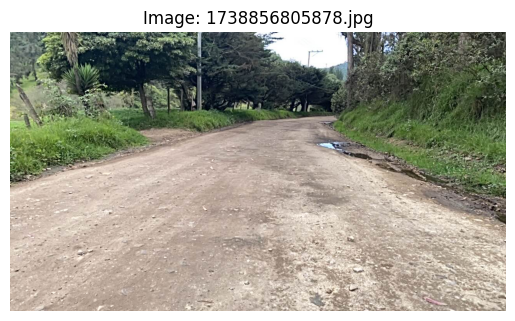

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = f'output/{image_filename}'

# Load the image using matplotlib
img = mpimg.imread(img_path)

# Display the image
plt.imshow(img)
plt.title(f"Image: {image_filename}")
plt.axis('off')  # Hide the axis
plt.show()

# Convert Segmentation Points to Polygon
Convert the segmentation array into numpy arrays of x,y coordinates and create a matplotlib polygon patch.

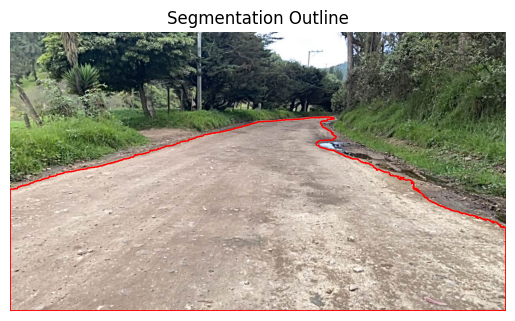

In [11]:
import numpy as np
import matplotlib.patches as patches

# Convert the segmentation array into numpy arrays of x, y coordinates
segmentation_coords = np.array(segmentation_coords).reshape(-1, 2)
x_coords, y_coords = segmentation_coords[:, 0], segmentation_coords[:, 1]

# Create a matplotlib polygon patch
polygon = patches.Polygon(segmentation_coords, closed=True, edgecolor='r', facecolor='none')

# Display the image with the polygon overlay
fig, ax = plt.subplots()
ax.imshow(img)
ax.add_patch(polygon)
plt.title(f"Segmentation Outline")
plt.axis('off')  # Hide the axis
plt.show()

# Overlay Segmentation on Image
Create a matplotlib figure and add the polygon overlay on top of the image with semi-transparency.

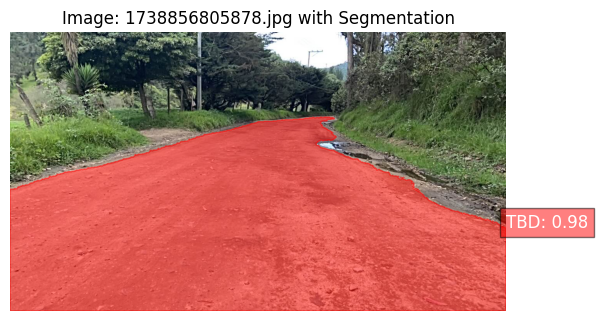

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import matplotlib.patches as patches

# Load the image using matplotlib
img = mpimg.imread(img_path)

# Convert the segmentation array into numpy arrays of x, y coordinates
segmentation_coords = np.array(segmentation_coords).reshape(-1, 2)
x_coords, y_coords = segmentation_coords[:, 0], segmentation_coords[:, 1]
# Add text annotation showing the confidence score and class label
class_label = data['class']
confidence_score = data['confidence_score']

# Create a matplotlib polygon patch with semi-transparency
polygon = patches.Polygon(segmentation_coords, closed=True, edgecolor='r', facecolor='r', alpha=0.5)

# Display the image with the polygon overlay
fig, ax = plt.subplots()
ax.imshow(img)
ax.add_patch(polygon)
plt.title(f"Image: {image_filename} with Segmentation")
plt.axis('off')  # Hide the axis

# Add text annotation for confidence score and class label
text_x, text_y = x_coords[0], y_coords[0]  # Position the text at the first coordinate of the segmentation
ax.text(text_x, text_y, f"{class_label}: {confidence_score:.2f}", color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

plt.show()